## **Mục lục**

**1. Định nghĩa vấn đề**<br>
- 1.1 Bối cảnh dữ liệu (Olist)<br>
- 1.2 Mục tiêu của Notebook này<br>

**2. Chuẩn bị vấn đề**<br>
- 2.1 Import thư viện<br>
- 2.2 Tải tất cả các bảng dữ liệu Olist

**3. Tổng quan & thông tin các bảng**<br>
- 3.1 ERD<br>
- 3.2 Thông tin các bảng: customers, orders, order_items, products, sellers, order_payments, order_reviews, geolocation, product_category_name_translation<br>

**4. Thống kê mô tả**<br>
- 4.1 đến 4.9 9 bảng và<br>
- Hiển thị 1 số thông tin về data<br>
- Kiểm tra tính toàn vẹn<br>
- Quan sát chất lượng dữ liệu ban đầu: thiếu dữ liệu, trùng lặp, cột nghi vấn<br>
- Liệt kê các cột thời gian và chuyển sang datetime<br>
- Kiểm tra logic thời gian (vd: giao hàng trước ngày mua?)<br>

**5. Hiểu dữ liệu từ góc nhìn nghiệp vụ**<br>
- Olist hoạt động như thế nào (Marketplace)<br>
- Ý nghĩa các bảng dữ liệu chính và các biến quan trọng cho phân tích<br>

______

## **1. Định nghĩa vấn đề**

### 1.1 Bối cảnh dữ liệu
Olist là một **marketplace** kết nối **người bán (sellers)** với **khách hàng (customers)** trên toàn Brazil.  
Các bước cơ bản trong vòng đời đơn hàng:

1. Khách hàng tạo đơn hàng trên nền tảng.
2. Đơn hàng được **xác nhận** (approved).
3. Đơn được giao cho **đơn vị vận chuyển**.
4. Khách hàng **nhận hàng**.
5. Khách hàng có thể **đánh giá sản phẩm và dịch vụ**.

Mục tiêu của dự án: xây dựng **Customer 360 View** để quan sát toàn bộ **vòng đời khách hàng**, hành vi mua hàng, chi tiêu, feedback và nguy cơ churn.

____
## **2. Chuẩn bị vấn đề**

### 2.1 Khai báo thư viện

In [34]:
import pandas as pd

### 2.2 Nạp dữ liệu

In [35]:
customers = pd.read_csv("../data/1_raw/olist_customers_dataset.csv")
orders = pd.read_csv("../data/1_raw/olist_orders_dataset.csv")
order_items = pd.read_csv("../data/1_raw/olist_order_items_dataset.csv")
products = pd.read_csv("../data/1_raw/olist_products_dataset.csv")
sellers = pd.read_csv("../data/1_raw/olist_sellers_dataset.csv")
order_paymens = pd.read_csv("../data/1_raw/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("../data/1_raw/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("../data/1_raw/olist_geolocation_dataset.csv")
product_category = pd.read_csv("../data/1_raw/product_category_name_translation.csv")

_____
## **3. Tổng quan & thông tin các bảng**

### 3.1 ERD

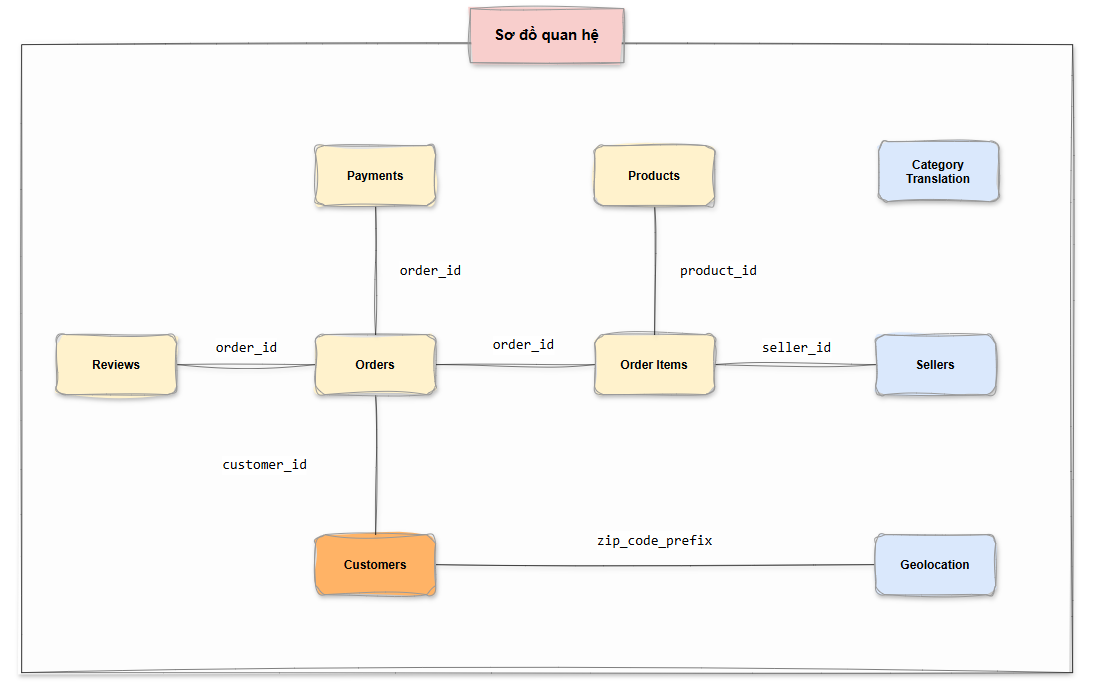

### 3.2 Thông tin các bảng

_____
## **4. Thống kê mô tả**

### 4.1 Bảng khách hàng (customer)

#### ***(1) Hiển thị một số thông tin về dữ liệu***
**Nhận xét:**<br>
- Tổng số dòng dữ liệu là 99441
- Tất cả các cột đều không có giá trị thiếu
- Một số cột categorical (customer_city, customer_state) có thể cần chuẩn hóa tên trước khi phân tích.
- `customer_id` có thể lặp lại nếu khách tạo nhiều đơn (có thể dùng email khác), còn `customer_unique_id` là duy nhất cho mỗi khách.

In [36]:
# Kích thước dữ liệu
print(f"+ Kích thước dữ liệu: {customers.shape}")

# Datatype
print(f"\n+ Loại dữ liệu:\n{customers.dtypes}")

# Dữ liệu mẫu
print(f"\n+ Dữ liệu mẫu:")
display(customers.head(2))

# Thông tin dữ liệu
print(f"\n+ Info: \n")
customers.info();

+ Kích thước dữ liệu: (99441, 5)

+ Loại dữ liệu:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

+ Dữ liệu mẫu:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP



+ Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### ***(2)  Kiểm tra tính toàn vẹn của dữ liệu***
**Nhận xét:**<br>
- Không có dòng trùng, giá trị rỗng

In [44]:
has_null = customers.isnull().sum().any()
has_nan  = customers.isna().sum().any()
n_duplicated = customers.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(customers[customers.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display(customers[customers.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    customers[customers.duplicated()]

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


_____
### 4.2 Bảng đơn hàng (order)

#### ***(1) Hiển thị một số thông tin về dữ liệu***
**Nhận xét:**<br>
- Tổng số dòng dữ liệu là 99441
- Có 3 cột có giá trị thiếu: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

Quy trình thời gian có sai trật tự:
- 23 đơn khách nhận trước khi hàng được đưa cho đơn vị vận chuyển (drop nếu dùng cho training model)
- 1359 đơn hàng được gửi cho đơn vị vận chuyển trước khi xác nhận (drop nếu dùng training model)

In [38]:
# Kích thước dữ liệu
print(f"+ Kích thước dữ liệu: {orders.shape}")

# Datatype
print(f"\n+ Loại dữ liệu:\n{orders.dtypes}")

# Dữ liệu mẫu
print(f"\n+ Dữ liệu mẫu:")
display(orders.head(2))

# Thông tin dữ liệu
print(f"\n+ Info: \n")
orders.info();

+ Kích thước dữ liệu: (99441, 8)

+ Loại dữ liệu:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

+ Dữ liệu mẫu:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00



+ Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
# Đặt hàng nhưng chưa được duyệt
print(orders[orders['order_purchase_timestamp'] > orders['order_approved_at']].shape)

# Đã giao cho hãng vận chuyển trước khi duyệt đơn
print(orders[orders['order_approved_at'] > orders['order_delivered_carrier_date']].shape)

# Khách nhận hàng trước khi đơn được giao
print(orders[orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']].shape)

(0, 8)
(1359, 8)
(23, 8)


#### ***(2)  Kiểm tra tính toàn vẹn của dữ liệu***
**Nhận xét:**<br>
- Không có dòng trùng
- Có 2980 bản ghi có giá trị rỗng trong vài cột thời gian (do khách hủy)

In [48]:
has_null = orders.isnull().sum().any()
n_duplicated = orders.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(orders[orders.isnull().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    orders[orders.duplicated()]

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


+ Số dòng trùng: 0


_____
## **5. Hiểu dữ liệu từ góc nhìn nghiệp vụ**

### 5.1 Ý nghĩa các bảng dữ liệu
| Bảng | Mục đích | Biến quan trọng cho phân tích |
|------|-----------|-------------------------------|
| `customers` | Thông tin khách hàng | `customer_id`, `customer_unique_id`, `customer_city`, `customer_state` |
| `orders` | Thông tin đơn hàng | `order_id`, `customer_id`, `order_status`, `order_purchase_timestamp`, `order_approved_at`, `order_delivered_customer_date` |
| `order_items` | Chi tiết sản phẩm trong đơn | `order_id`, `product_id`, `price`, `freight_value` |
| `products` | Thông tin sản phẩm | `product_id`, `product_category_name` |
| `sellers` | Thông tin người bán | `seller_id`, `seller_city`, `seller_state` |
| `order_payments` | Thanh toán | `order_id`, `payment_type`, `payment_value` |
| `order_reviews` | Feedback khách hàng | `review_score`, `review_comment_title`, `review_comment_message` |
| `geolocation` | Thông tin địa lý | `geolocation_zip_code_prefix`, `geolocation_city`, `geolocation_state` |
| `product_category_name_translation` | Dịch tên danh mục sản phẩm | `product_category_name`, `product_category_name_english` |

---

### 5.2 Biến quan trọng cho phân tích Customer 360 & RFM
- **Recency:** `order_delivered_customer_date`
- **Frequency:** số đơn hàng (`order_id`)
- **Monetary:** tổng giá trị đơn hàng (`price + freight_value`)
- **Đặc điểm khách hàng:** `customer_city`, `customer_state`
- **Đánh giá & feedback:** `review_score`
- **Trạng thái đơn hàng:** `order_status` (delivered, canceled…)

---

### 5.3 Mục tiêu nghiệp vụ
- Xác định **nhóm khách hàng VIP, trung thành, at-risk**.
- Tính **giá trị vòng đời khách hàng (Customer Lifetime Value)**.
- Theo dõi **hành vi mua hàng, đánh giá sản phẩm, và rủi ro churn**.
- Hỗ trợ **trực quan hóa & chatbot** để người dùng xem chi tiết vòng đời khách hàng.